In [107]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [108]:
#The data corresponds to a matrix in which each row vector corresponds to a 20x20 spin configuration
#at a certain temperature. The namber of rows of this data matrix indicates the number of conficurations
#and the number of columns is 20**2

#the data was generated using the code found in https://github.com/tarod13/Monograph

#configurations with mode=0, the initial state is a random  matrix 
with open('spins_COP_NP.p', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)
with open('temperatures_COP_NP.p', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    temp = pickle.load(f)
    
#configurations with mode=1, the initial state is a perfectly divided matrix
with open('spins_COP_NP2.p', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data1 = pickle.load(f)
with open('temperatures_COP_NP2.p', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    temp1 = pickle.load(f)

In [109]:
n_config=np.shape(data)[0]
n_T=np.shape(data)[1]
n_spins=np.sqrt(len(data[0,:]))

print(n_config)
print(n_T)
print(n_spins)

M=[] #stores the total (scaled) magnetization of each configuration in terms of temperature
M1=[] #stores the total (scaled) magnetization of each configuration in terms of temperature for mode 1



#calculates magnetization for each configuration
for i in range(0,n_config):
    m=0
    m1=0
    m=np.sum(data[i,:])/n_spins**2 
    m1=np.sum(data1[i,:])/n_spins**2
    
    M.append(m)
    M1.append(m1)  

1024
400
20.0


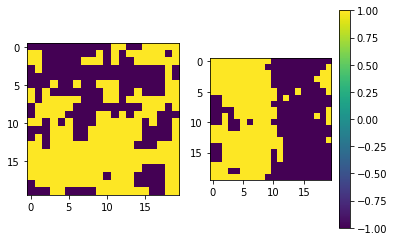

In [110]:
#data visualisation
fig1, ax1 = plt.subplots(1,2)
im1 = ax1[0].imshow(data[0,:].reshape(20,20))
im2 = ax1[1].imshow(data1[0,:].reshape(20,20))
fig1.colorbar(im1)
fig1.gca().set_aspect('equal', adjustable='box')

Text(0.5,1,'M=1, Prefectly divided initial state')

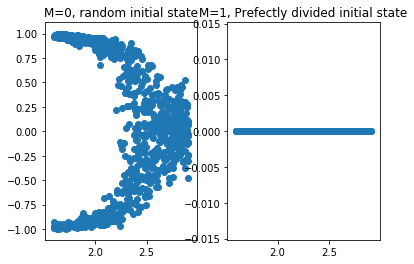

In [111]:
#plotting magnetization against temperature
fig2, ax2 = plt.subplots(1,2)
im2 = ax2[0].scatter(temp,M)
im2=("M=0, random initial state")
im2 = ax2[1].scatter(temp1,M1)
ax2[0].set_title("M=0, random initial state")
ax2[1].set_title("M=1, Prefectly divided initial state")

In [112]:
#estimate the magnetization curve
#Since this is an ellypse we will find a fit for the data points using the code found in:
#http://nicky.vanforeest.com/misc/fitEllipse/fitEllipse.html which treats the problem as a lagrange multiplier problem

from numpy.linalg import eig, inv

def fitEllipse(x,y):
    x = x[:,np.newaxis]
    y = y[:,np.newaxis]
    D =  np.hstack((x*x, x*y, y*y, x, y, np.ones_like(x)))
    S = np.dot(D.T,D)
    C = np.zeros([6,6])
    C[0,2] = C[2,0] = 2; C[1,1] = -1
    E, V =  eig(np.dot(inv(S), C))
    n = np.argmax(np.abs(E))
    a = V[:,n]
    return a

def ellipse_center(a):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    num = b*b-a*c
    x0=(c*d-b*f)/num
    y0=(a*f-b*d)/num
    return np.array([x0,y0])


def ellipse_angle_of_rotation( a ):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    return 0.5*np.arctan(2*b/(a-c))


def ellipse_axis_length( a ):
    b,c,d,f,g,a = a[1]/2, a[2], a[3]/2, a[4]/2, a[5], a[0]
    up = 2*(a*f*f+c*d*d+g*b*b-2*b*d*f-a*c*g)
    down1=(b*b-a*c)*( (c-a)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    down2=(b*b-a*c)*( (a-c)*np.sqrt(1+4*b*b/((a-c)*(a-c)))-(c+a))
    res1=np.sqrt(up/down1)
    res2=np.sqrt(up/down2)
    return np.array([res1, res2])

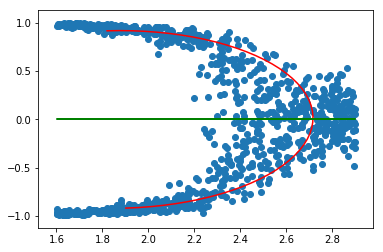

In [113]:
a = fitEllipse(temp,np.asarray(M)) #feeds M as an array because it is defined as a list
center = ellipse_center(a)
phi = ellipse_angle_of_rotation(a)
axes = ellipse_axis_length(a)
R= np.linspace(-np.pi*4/9,np.pi*5/9)

a, b = axes
xx = center[0] + a*np.cos(R)*np.cos(phi) - b*np.sin(R)*np.sin(phi)
yy = center[1] + a*np.cos(R)*np.sin(phi) + b*np.sin(R)*np.cos(phi)

plt.plot(xx,yy,color='red')
plt.plot(temp,np.zeros(len(temp)),color='green')
plt.scatter(temp,M)

In [ ]:
#Now sepparate